In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 10/ratings2.csv")

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movie_titles = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 10/movies.csv")

In [6]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
data = pd.merge(df, movie_titles, on ='movieId') 
data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [9]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [10]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 

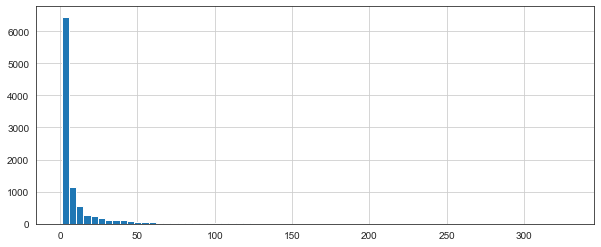

In [12]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

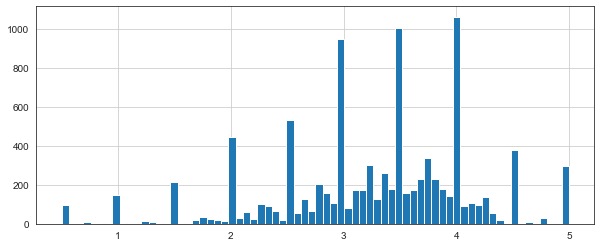

In [13]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

In [14]:
# Sorting values according to  
# the 'num of rating column' 
moviemat = data.pivot_table(index ='userId', 
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [15]:
moviemat.head() 

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# analysing correlation with similar movies 
ForrestGump_user_ratings = moviemat['Forrest Gump (1994)'] 
JurassicPark_user_ratings = moviemat['Jurassic Park (1993)'] 
  
ForrestGump_user_ratings.head() 

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [17]:
# analysing correlation with similar movies 
similar_to_ForrestGump = moviemat.corrwith(ForrestGump_user_ratings) 
similar_to_JurassicPark = moviemat.corrwith(JurassicPark_user_ratings) 
  
corr_ForrestGump = pd.DataFrame(similar_to_ForrestGump, columns =['Correlation']) 
corr_ForrestGump.dropna(inplace = True) 
  
corr_ForrestGump.head() 

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [18]:
# Similar movies like starwars 
corr_ForrestGump.sort_values('Correlation', ascending = False).head(10) 
corr_ForrestGump = corr_ForrestGump.join(ratings['num of ratings']) 
  
corr_ForrestGump.head() 
  
corr_ForrestGump[corr_ForrestGump['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [19]:
corr_JurassicPark = pd.DataFrame(similar_to_JurassicPark, columns =['Correlation']) 
corr_JurassicPark.dropna(inplace = True) 
  
corr_JurassicPark.head() 

,Correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


In [20]:
# Similar movies like JurassicPark 
corr_JurassicPark.sort_values('Correlation', ascending = False).head(10) 
corr_JurassicPark = corr_JurassicPark.join(ratings['num of ratings']) 
  
corr_JurassicPark.head() 
  
corr_JurassicPark[corr_JurassicPark['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
